<a href="https://colab.research.google.com/github/AvRob0/Avrob0.github.io/blob/main/Week_4_Assignment_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the dataset and perform the following operations to viaualize data and explain your insights in one sentence.

You can use python libraries to viaualize the data or use data visualization applications like Tableau/ Power BI according to your convenience.

The intent of this assignment is to be able to communicate the insights that you found

---



1. Visualize the survival rate of passengers based on their ticket class (1st, 2nd, or 3rd class).
Were the passengers in higher classes more likely to survive?

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

titanic_db = pd.read_csv('Titanic.csv')
titanic_db
# to visualize the survival rate of passengers based on their ticket class and see which were more likely survive
# we must first group the passenger class together
# and calculate the survival rate
group_pass = titanic_db.groupby(['class']).agg({'survived': ['count', 'mean']}).reset_index()
group_pass.columns = ['class', 'count', 'mean']
group_pass
# As you can see that first class has a higher survival rate followed by second and then third.
# This visualization of the survival rate of the classes shows that third class has more people than any other class
# with a lower survival rate followed by first class that has an estimate of half less than third class
# and second class has the lowest count of people but still comes second in survival rate.

,class,count,mean
0,First,216,0.629630
1,Second,184,0.472826
2,Third,491,0.242363


<ipython-input-2-91874b9a5b14>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['1st Class', '2nd Class', '3rd Class'])


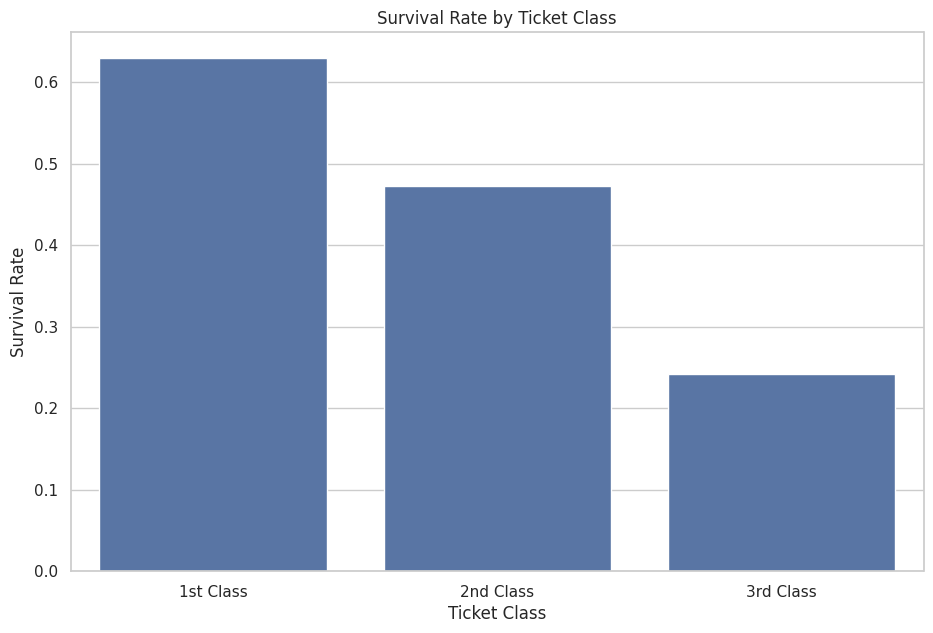

In [2]:
sns.set(style="whitegrid", rc={"figure.figsize": (11, 7)})
plt.figure()
ax = sns.barplot(x='class', y='mean', data=group_pass)
ax.set_xticklabels(['1st Class', '2nd Class', '3rd Class'])
plt.title('Survival Rate by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Survival Rate')
plt.show()
# Has you can see the bar graph show how big of a difference at that time class makes on survival

Explanation here:

2. Create a histogram to visualize the distribution of passenger ages. What is the age distribution like on the Titanic?

In [13]:
# I put the titanic datafile into the variable titanic_db_2
titanic_db_2 = pd.read_csv('Titanic.csv')
titanic_db_2


# Since the titanic database have missing data I will replace the missing values with the median of each class

# Calculate the median age for each class
median_age = titanic_db_2.groupby('class')['age'].median().reset_index()

# Merge the median age back into the original DataFrame
titanic_db_2 = pd.merge(titanic_db_2, median_age, on='class', how='left', suffixes=('', '_median'))

# Fill missing ages with the median age for the corresponding class
titanic_db_2['age'].fillna(titanic_db_2['age_median'], inplace=True)

# Drop the temporary median age column
titanic_db_2.drop('age_median', axis=1, inplace=True)

titanic_db_2

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,S,Second,man,True,0
887,female,19.0,0,0,30.0000,S,First,woman,True,1
888,female,24.0,1,2,23.4500,S,Third,woman,False,0
889,male,26.0,0,0,30.0000,C,First,man,True,1


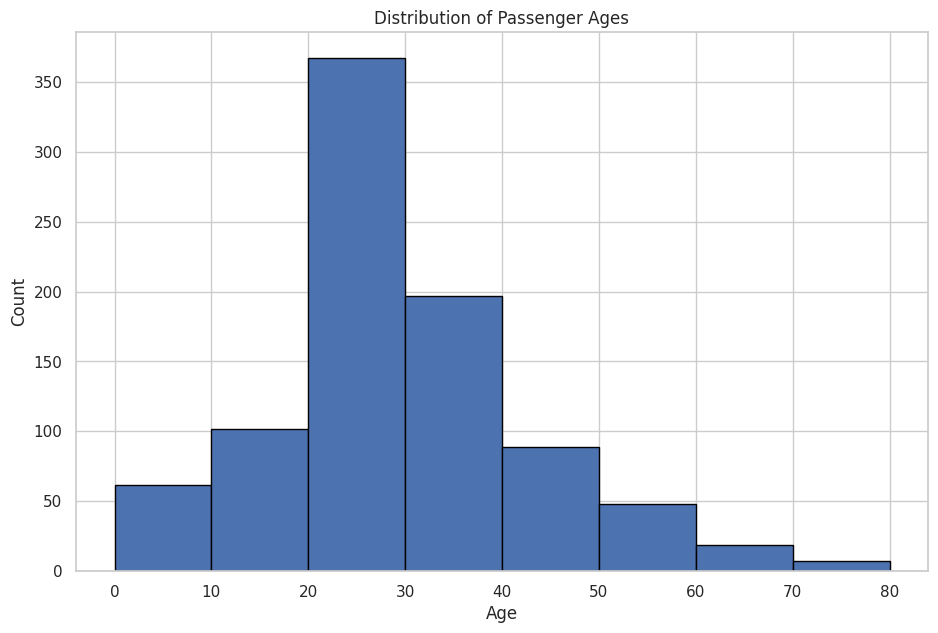

In [15]:
bin_edges = np.arange(0, 81, 10)
plt.hist(titanic_db_2['age'], bins=bin_edges, edgecolor='black')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
# As you can see the distribution of the ages by the count of total number of passengers on the ship
# Where you can see most of the passengers where in the ages between 20 - 30 ranging around 370 passengers on the ship
# Then we have almost 200 passengers that are in the age between 30 - 40
# Then we have almost 100 passengers that are in the age between 10 - 20
# Then we have about 80 - 75 passengers between the ages 40 - 50
# And then we have a decline from there from about 58 or 59 passengers are at ages between 50 - 60
# After that we have about 30 passengers at ages 60 -70
# With the remaining passengers coming in at about 10 - 15 passengers between ages 70 - 80

Explanation here:

3. Generate a bar chart to compare the survival rates of male and female passengers. Did gender play a role in survival?

In [18]:
# created the variable survival_rate to store the
survival_rate = pd.read_csv('Titanic.csv')
#survival_rate
# creating 2 variables to store the sex data and survived data
sex = survival_rate['sex']
survived = survival_rate['survived']
# Group the sex data by male and female and calculated the survival rate
male_count = survived[survival_rate['sex'] == 'male'].sum()
female_count = survived[survival_rate['sex'] == 'female'].sum()
total_passengers = len(survived)

male_survival_rate = round((male_count / total_passengers) * 100, 2)
female_survival_rate = round((female_count / total_passengers) * 100, 2)
# I print the male and female survival rate to see the percentage
print(f"Male Survival Rate: {male_survival_rate}%")
print(f"Female Survival Rate: {female_survival_rate}%")

Male Survival Rate: 12.23%
Female Survival Rate: 26.15%


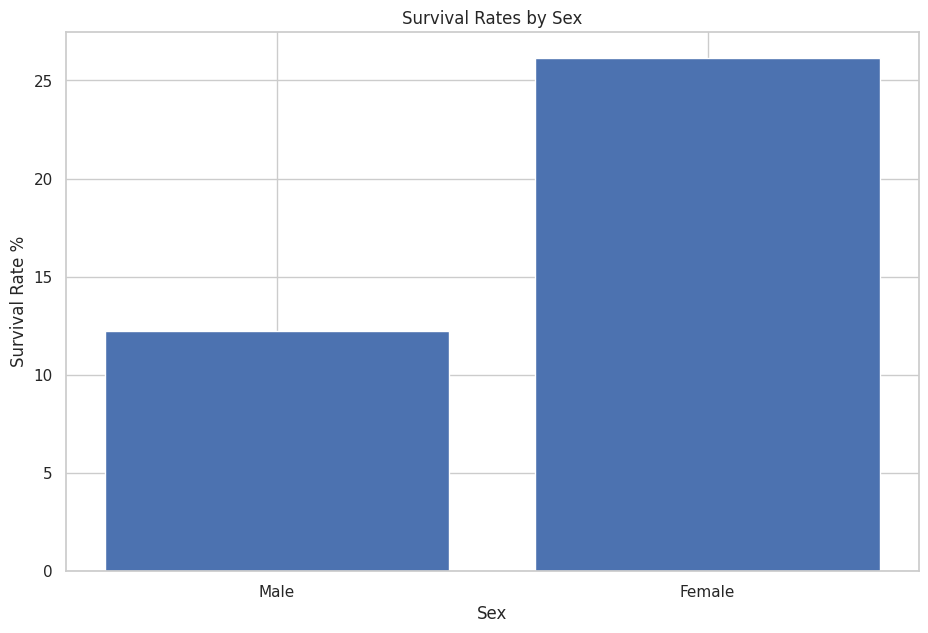

In [20]:
# Creating a bar graph from the results
plt.bar(['Male', 'Female'], [male_survival_rate, female_survival_rate])
plt.title('Survival Rates by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate %')
plt.show()
# I would say yes gender played a role in between the two sexes
# As you can see that female plotted at 26.15%
# And male plotted at 12.23%

Explanation here:

4. Visualize the distribution of ticket fares for each passenger class using box plots. How did ticket fares vary across different classes?

In [ ]:
# Code here

Explanation here:

5. Create a grouped bar chart to visualize the survival rates of passengers across different age groups and genders. Were certain age groups or genders more likely to survive?

In [ ]:
# Code here

Explanation here: